In [3]:
import numpy as np
import trace_gen as tg
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
import scipy.stats as ss

In [4]:
def mrc_compute(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_lru = [tg.sim_lru(int(_c), trace, raw=True) for _c in c]
    return c, hr_lru

def mae(hr1, hr2):
    return np.mean(np.abs(hr1 - hr2))
def norm(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def plot_mrcs(title, cs, lrus, names, location='lower right'):
    cs_normalized = [c / c.max() for c in cs]
    palette = sns.color_palette("husl", len(cs))
    fig, ax = plt.subplots(figsize=(10, 6))  # Optional: set a specific figure size

    ax.grid(True, linestyle='--', alpha=0.5)
    for i in range(len(cs)):
        linestyle = '-' if i % 2 == 0 else '--'
        marker = '+' if i % 3 == 0 else ''
        ax.plot(
            cs_normalized[i], 
            lrus[i], 
            linestyle + marker, 
            label=names[i], 
            linewidth=5 if i == len(cs) - 1 else 4, 
            color=palette[i], 
            alpha=0.8 if i != len(cs) - 1 else 1.0
        )
    
    ax.set_title(title, fontsize=28)
    ax.set_xlabel('Normalized Cache Size (C)', fontsize=28)
    ax.set_ylabel('Hit Rate', fontsize=28)
    ax.tick_params(axis='both',  labelsize=20)
    ax.legend(loc=location, fontsize=28)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(True)
    ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
    plt.tight_layout()
    plt.show()

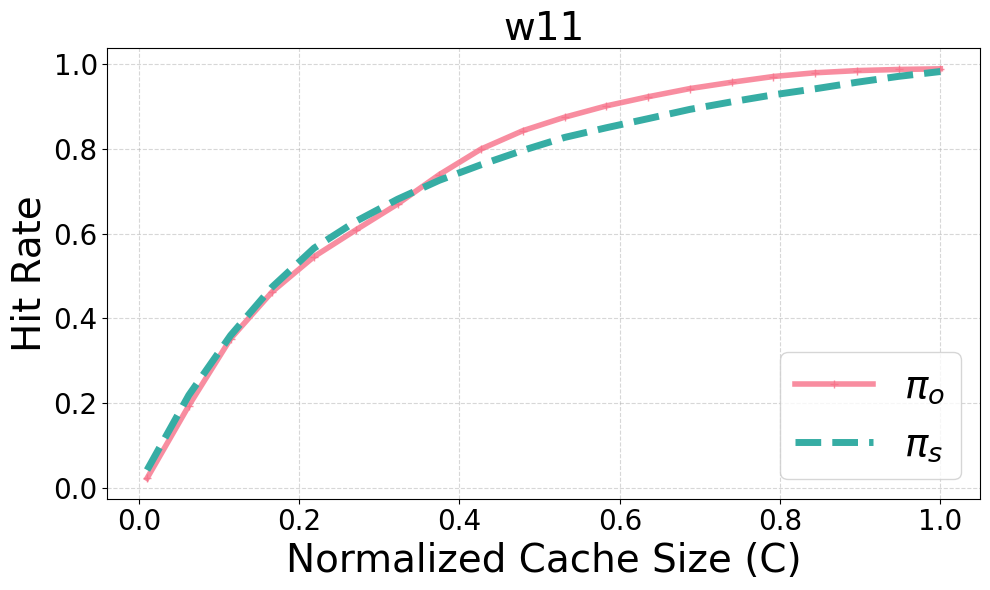

In [5]:
c_w11 = np.loadtxt('/home/yirongwn/data/LRU/w11_c.txt', dtype=np.int32)
hr_w11 = np.loadtxt('/home/yirongwn/data/LRU/w11_lru_hr.txt', dtype=np.float32)
g11 = tg.TraceGenerator(100, 10000)
g11.set_irm_type('zipf')
g11.set_zipf(1.3)
t11 = g11.gen_from_pdf(g11.pdf_b, 1.0)
cs11, hrs11 = mrc_compute(t11)
plot_mrcs('w11', [c_w11, cs11], [hr_w11, hrs11], ['$\pi_o$', '$\pi_s$'
], 'lower right')

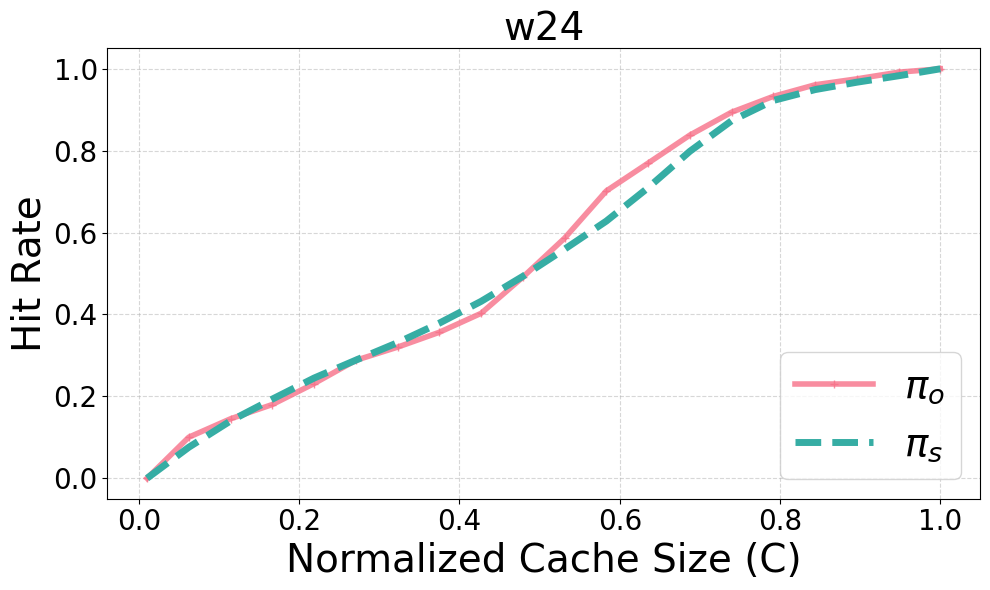

In [6]:
c_w24 = np.loadtxt('/home/yirongwn/data/LRU/w24_c.txt', dtype=np.int32)
hr_w24 = np.loadtxt('/home/yirongwn/data/LRU/w24_lru_hr.txt', dtype=np.float32)
g24 = tg.TraceGenerator(100, 10000)
pdf_e = tg.fgen(30, np.array([1,2]), 5e-3)
t24 = g24.gen_from_pdf(pdf_e, 0.45)
cs24, hrs24 = mrc_compute(t24)
plot_mrcs('w24', [c_w24, cs24], [norm(hr_w24), norm(hrs24)], ['$\pi_o$', '$\pi_s$'], 'lower right')

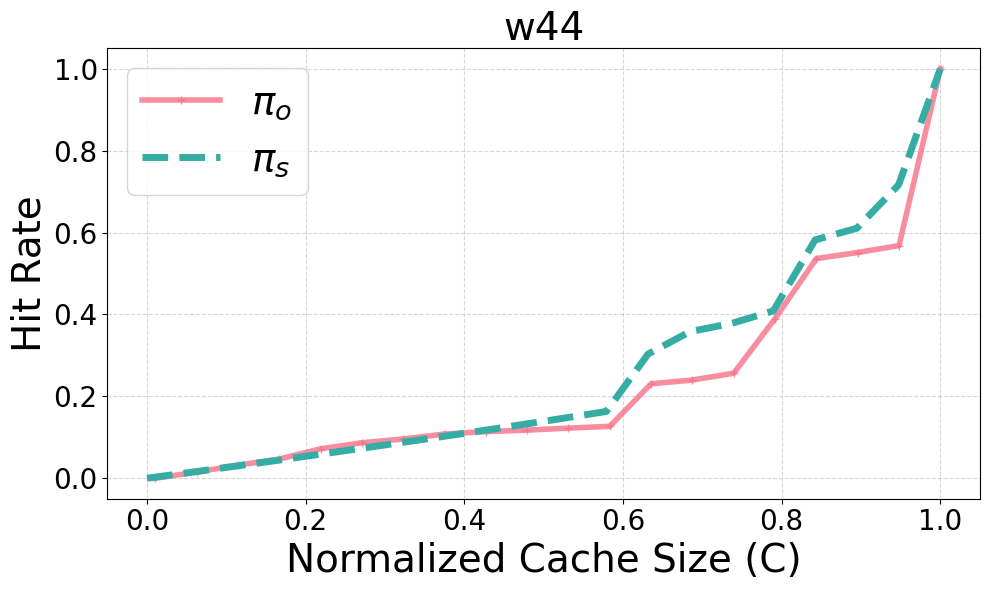

In [7]:
c_w44 = np.loadtxt('/home/yirongwn/data/LRU/w44_c.txt', dtype=np.int32)
hr_w44 = np.loadtxt('/home/yirongwn/data/LRU/w44_lru_hr.txt', dtype=np.float32)
g44 = tg.TraceGenerator(10000, 1000000)
pdf_e = tg.fgen(30, np.array([9, 13, 17, 19]), 2.5e-2)
t44 = g44.gen_from_pdf(pdf_e, 0.0)
cs44, hrs44 = mrc_compute(t44)
plot_mrcs('w44', [c_w44, cs44], [norm(hr_w44), norm(hrs44)], ['$\pi_o$', '$\pi_s$'], 'upper left')

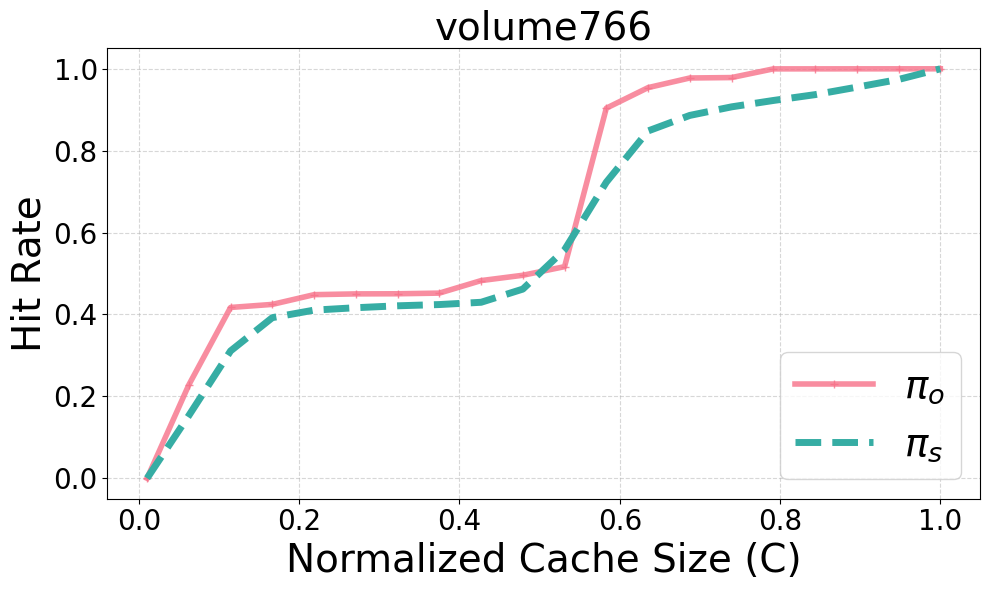

In [8]:
c_v766 = np.loadtxt('/home/yirongwn/data/LRU/v766_c.txt', dtype=np.int32)
hr_v766 = np.loadtxt('/home/yirongwn/data/LRU/v766_lru_hr.txt', dtype=np.float32)
g766 = tg.TraceGenerator(100, 10000)
g766.set_p_single(0.0)
pdf766 = tg.fgen(40, [0,5], 5.7e-3)
t766 = g766.gen_from_pdf(pdf766, 0.0)
cs766, hrs766 = mrc_compute(t766)
plot_mrcs('volume766',[c_v766, cs766], [norm(hr_v766), norm(hrs766)], ['$\pi_o$', '$\pi_s$'
], 'lower right')

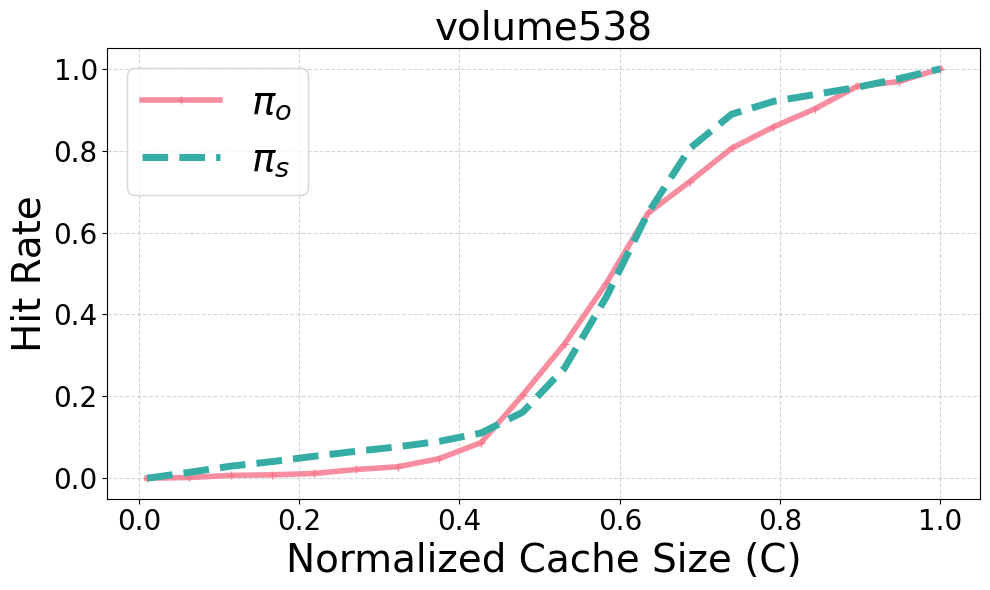

In [9]:
c_v538 = np.loadtxt('/home/yirongwn/data/LRU/v538_c.txt', dtype=np.int32)
hr_v538 = np.loadtxt('/home/yirongwn/data/LRU/v538_lru_hr.txt', dtype=np.float32)
g538 = tg.TraceGenerator(100, 10000)
pdf538 = tg.fgen(40,np.array([3,4]), 5e-3)
t538 = g538.gen_from_pdf(pdf538, 0.1)
cs538, hrs538 = mrc_compute(t538)
plot_mrcs('volume538',[c_v538, cs538], [norm(hr_v538), norm(hrs538)], ['$\pi_o$', '$\pi_s$'
], 'upper left')

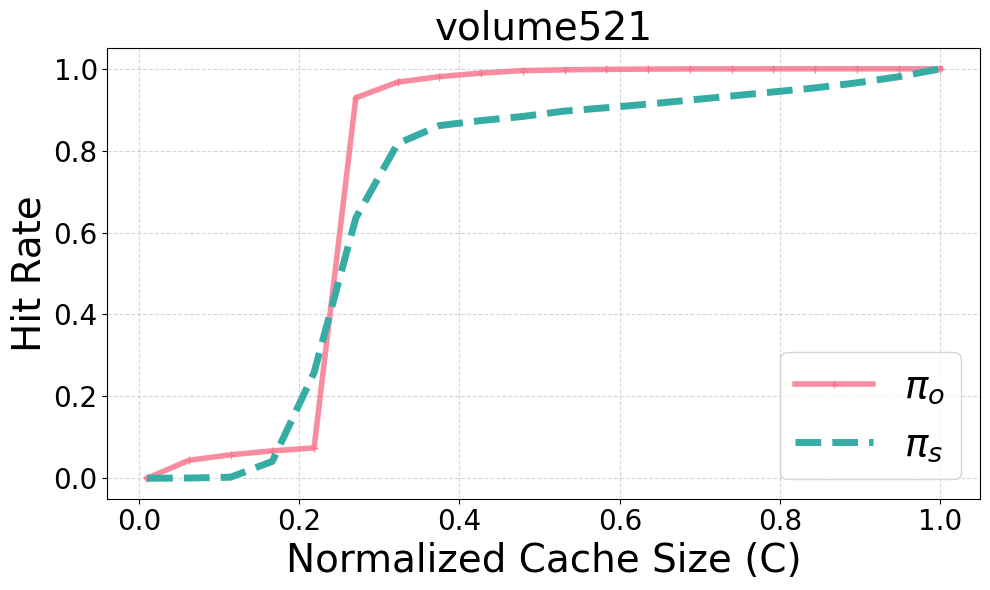

In [10]:
c_v521 = np.loadtxt('/home/yirongwn/data/LRU/v521_c.txt', dtype=np.int32)
hr_v521 = np.loadtxt('/home/yirongwn/data/LRU/v521_lru_hr.txt', dtype=np.float32)
g521 = tg.TraceGenerator(100, 10000)
pdf521 = tg.fgen(100, np.array([2]), 2e-3)
t521 = g521.gen_from_pdf(pdf521, 0.0)
cs521, hrs521 = mrc_compute(t521)
plot_mrcs('volume521',[c_v521, cs521], [norm(hr_v521), norm(hrs521)], ['$\pi_o$', '$\pi_s$'
], 'lower right')

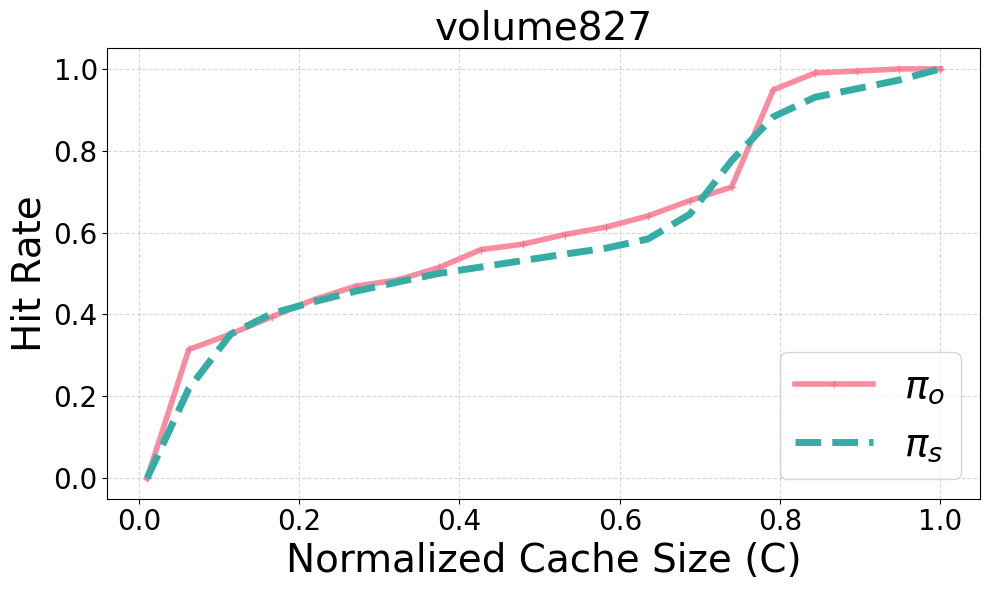

In [11]:
hr_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_lru_hr.txt', dtype=np.float32)
c_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_c.txt', dtype=np.int32)
g827 = tg.TraceGenerator(100, 10000)
pdf827 = tg.fgen(60, np.array([0,13]), 5e-3)
t827 = g827.gen_from_pdf(pdf827, 0.2)
cs827, hrs827 = mrc_compute(t827)
plot_mrcs('volume827',[c_v827, cs827], [norm(hr_v827), norm(hrs827)], ['$\pi_o$', '$\pi_s$'
], 'lower right')

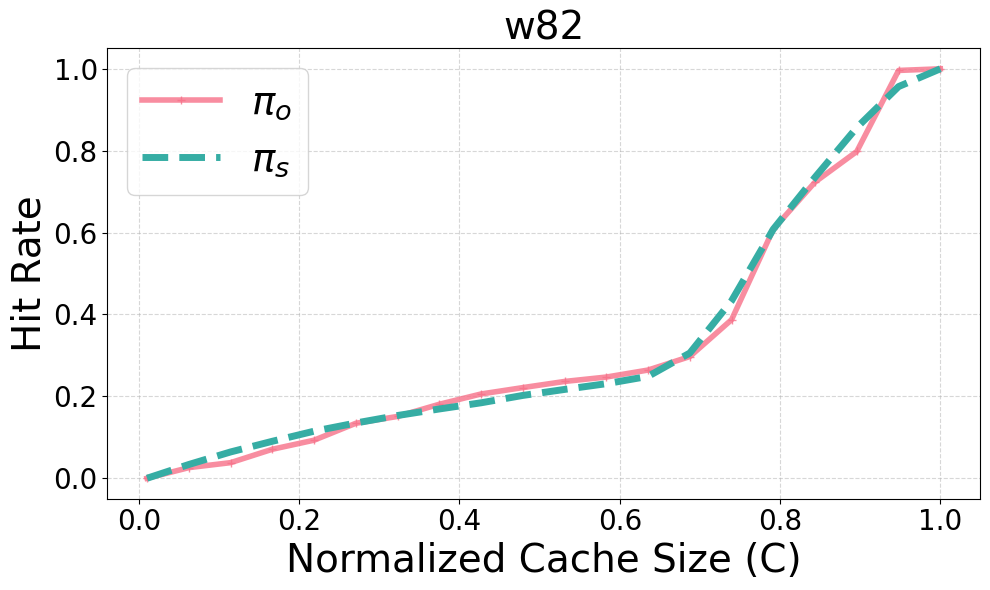

In [12]:
c_w82 = np.loadtxt('/home/yirongwn/data/LRU/w82_c.txt', dtype=np.int32)
hr_w82 = np.loadtxt('/home/yirongwn/data/LRU/w82_lru_hr.txt', dtype=np.float32)
g82 = tg.TraceGenerator(100, 10000)
pdf82 = tg.fgen(100, np.array([12, 13, 19]), 1e-3)
t82 = g82.gen_from_pdf(pdf82, 0.2)
cs82, hrs82 = mrc_compute(t82)
plot_mrcs('w82', [c_w82, cs82], [norm(hr_w82), norm(hrs82)], ['$\pi_o$', '$\pi_s$'], 'upper left')